In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_419100/2174054843.py:8: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [3]:
%%R
library(tidyverse)
library(dyno)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: dynfeature
Loading required package: dynguidelines
Loading required package: dynmethods
Loading required package: dynplot
Loading required package: dynwrap
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [4]:
%%R
data <- readRDS("mouse-cell-atlas-combination-2.rds")

In [5]:
%%R
library(dyneval)

In [6]:
%%R
library(dyndimred)
pca_dimred <- dimred_pca(
  data$expression
)

In [7]:
%%R
grouping <- data$grouping

Loading required namespace: RColorBrewer


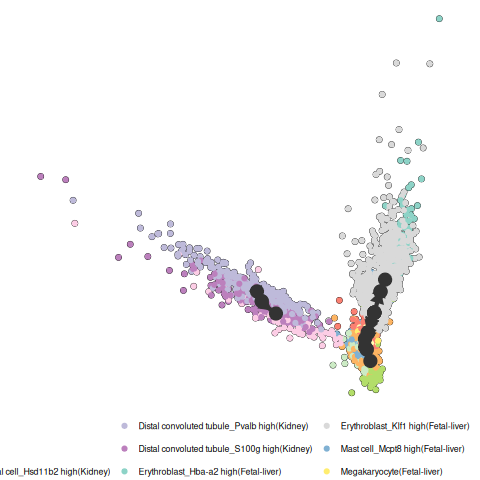

In [8]:
%%R
plot_dimred(data, dimred=pca_dimred, color_cells="grouping")

HIM = 0.3893776 
F1_branches = 0.2994259 
correlation = 0.5747474 
featureimp_wcor = 0.7590469 
overall_score = 0.4748992 


Coloring by milestone
Using milestone_percentages from trajectory


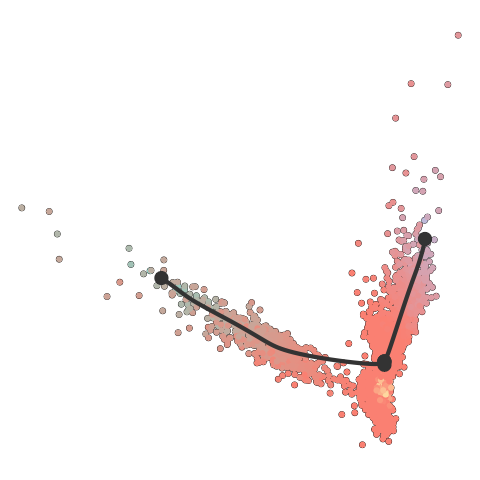

In [9]:
%%R
dpt_model <- infer_trajectory(data, ti_dpt(), give_priors = c("start_id"))
dpt_model <- add_cell_waypoints(dpt_model)
dpt_metrics <- calculate_metrics(
  dataset = data,
  model = dpt_model,
  metrics = c("him", "F1_branches", "correlation", "featureimp_wcor"),
  expression_source = data$expression
)
cat("HIM =", dpt_metrics$him, "\n")
cat("F1_branches =", dpt_metrics$F1_branches, "\n")
cat("correlation =", dpt_metrics$correlation, "\n")
cat("featureimp_wcor =", dpt_metrics$featureimp_wcor, "\n")
dpt_selected_metrics <- c(
  him = as.numeric(dpt_metrics$him),
  F1_branches = dpt_metrics$F1_branches,
  correlation = dpt_metrics$correlation,
  featureimp_wcor = dpt_metrics$featureimp_wcor
)
dpt_overall_score <- exp(mean(log(dpt_selected_metrics)))
cat("overall_score =", dpt_overall_score, "\n")
plot_dimred(dpt_model, dimred=pca_dimred)

In [10]:
%%R
dyn_paga_model <- infer_trajectory(data, ti_paga(), give_priors = c("start_id"))

Error: R[write to console]: Error in normalise(counts) : 
  trying to get slot "x" from an object of a basic class ("matrix") with no slots
Calls: <Anonymous> ... <Anonymous> -> <Anonymous> -> parse_dataset -> normalise

Traceback (most recent call last):
  File "/code/run.py", line 4, in <module>
    task = dynclipy.main()
  File "/usr/local/lib/python3.7/site-packages/dynclipy/read.py", line 122, in main
    """)
  File "/usr/local/lib/python3.7/site-packages/rpy2/robjects/__init__.py", line 389, in __call__
    res = self.eval(p)
  File "/usr/local/lib/python3.7/site-packages/rpy2/robjects/functions.py", line 192, in __call__
    .__call__(*args, **kwargs))
  File "/usr/local/lib/python3.7/site-packages/rpy2/robjects/functions.py", line 121, in __call__
    res = super(Function, self).__call__(*new_args, **new_kwargs)
  File "/usr/local/lib/python3.7/site-packages/rpy2/rinterface_lib/conversion.py", line 28, in _
    cdata = function(*args, **kwargs)
  File "/usr/local/lib/python3.7

RInterpreterError: Failed to parse and evaluate line 'dyn_paga_model <- infer_trajectory(data, ti_paga(), give_priors = c("start_id"))\n'.
R error message: 'Error: Error during trajectory inference, see output above ↑↑↑'

HIM = 0.3894969 
F1_branches = 0.3234799 
correlation = 0.6707003 
featureimp_wcor = 0.5858627 
overall_score = 0.4717033 


Coloring by milestone
Using milestone_percentages from trajectory


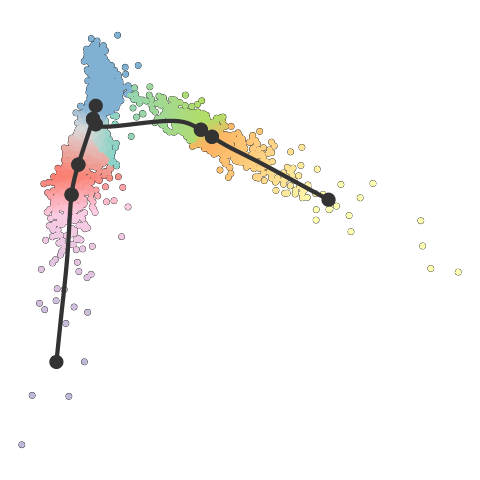

In [13]:
%%R
mst_model <- infer_trajectory(data, ti_mst(), give_priors = c("start_id"))
mst_model <- add_cell_waypoints(mst_model)
mst_metrics <- calculate_metrics(
  dataset = data,
  model = mst_model,
  metrics = c("him", "F1_branches", "correlation", "featureimp_wcor"),
  expression_source = data$expression
)
cat("HIM =", mst_metrics$him, "\n")
cat("F1_branches =", mst_metrics$F1_branches, "\n")
cat("correlation =", mst_metrics$correlation, "\n")
cat("featureimp_wcor =", mst_metrics$featureimp_wcor, "\n")
mst_selected_metrics <- c(
  him = as.numeric(mst_metrics$him),
  F1_branches = mst_metrics$F1_branches,
  correlation = mst_metrics$correlation,
  featureimp_wcor = mst_metrics$featureimp_wcor
)
mst_overall_score <- exp(mean(log(mst_selected_metrics)))
cat("overall_score =", mst_overall_score, "\n")
plot_dimred(mst_model, dimred=pca_dimred)

HIM = 0.2715863 
F1_branches = 0.2287983 
correlation = 0.8670064 
featureimp_wcor = 0.9288748 
overall_score = 0.4729716 


You can run this method as an R wrapper (1, default) or as a container (2)
Which do you want to use? This option will be saved in options(dynwrap_backend = c('r_wrapper', 'container'))
1: R wrapper [default]
2: Container
Following packages have to be installed: SCORPIUS
Do you want to install these packages? 
1: Yes [default]
2: No
Skipping install of 'SCORPIUS' from a github remote, the SHA1 (a0a97907) has not changed since last install.
  Use `force = TRUE` to force installation
Coloring by milestone
Using milestone_percentages from trajectory
In addition: Warning message:
`data_frame()` was deprecated in tibble 1.1.0.
ℹ Please use `tibble()` instead.
ℹ The deprecated feature was likely used in the dyneval package.
  Please report the issue to the authors.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


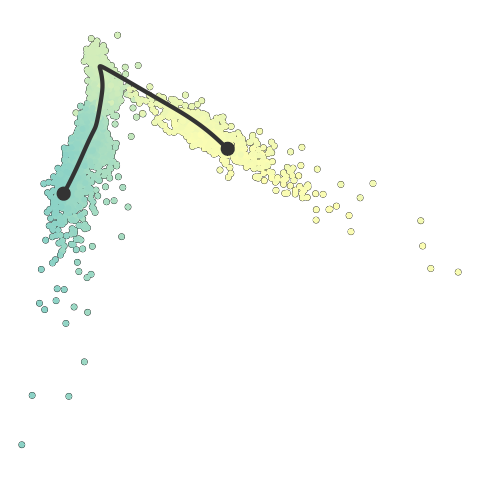

In [14]:
%%R
scorpius_model <- infer_trajectory(data, ti_scorpius(), give_priors = c("start_id"))
scorpius_model <- add_cell_waypoints(scorpius_model)
scorpius_metrics <- calculate_metrics(
  dataset = data,
  model = scorpius_model,
  metrics = c("him", "F1_branches", "correlation", "featureimp_wcor"),
  expression_source = data$expression
)
cat("HIM =", scorpius_metrics$him, "\n")
cat("F1_branches =", scorpius_metrics$F1_branches, "\n")
cat("correlation =", scorpius_metrics$correlation, "\n")
cat("featureimp_wcor =", scorpius_metrics$featureimp_wcor, "\n")
scorpius_selected_metrics <- c(
  him = as.numeric(scorpius_metrics$him),
  F1_branches = scorpius_metrics$F1_branches,
  correlation = scorpius_metrics$correlation,
  featureimp_wcor = scorpius_metrics$featureimp_wcor
)
scorpius_overall_score <- exp(mean(log(scorpius_selected_metrics)))
cat("overall_score =", scorpius_overall_score, "\n")
plot_dimred(scorpius_model, dimred=pca_dimred)

HIM = 0.4448749 
F1_branches = 0.2687963 
correlation = 0.8664661 
featureimp_wcor = 0.806836 
overall_score = 0.5377117 


Following packages have to be installed: tislingshot
Do you want to install these packages? 
1: Yes [default]
2: No
Skipping install of 'tislingshot' from a github remote, the SHA1 (65248eca) has not changed since last install.
  Use `force = TRUE` to force installation
Coloring by milestone
Using milestone_percentages from trajectory


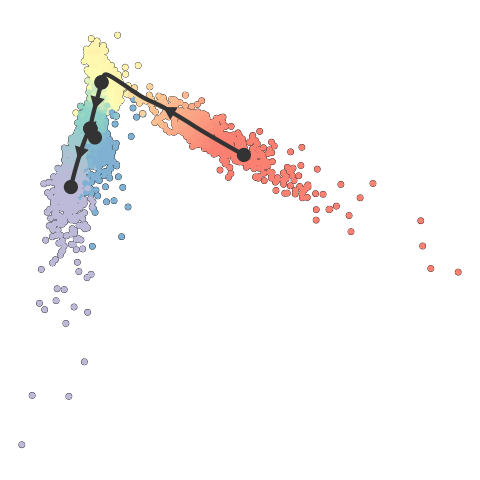

In [18]:
%%R
slingshot_model <- infer_trajectory(data, ti_slingshot(), give_priors = c("start_id"))
slingshot_model <- add_cell_waypoints(slingshot_model)
slingshot_metrics <- calculate_metrics(
  dataset = data,
  model = slingshot_model,
  metrics = c("him", "F1_branches", "correlation", "featureimp_wcor"),
  expression_source = data$expression
)
cat("HIM =", slingshot_metrics$him, "\n")
cat("F1_branches =", slingshot_metrics$F1_branches, "\n")
cat("correlation =", slingshot_metrics$correlation, "\n")
cat("featureimp_wcor =", slingshot_metrics$featureimp_wcor, "\n")
slingshot_selected_metrics <- c(
  him = as.numeric(slingshot_metrics$him),
  F1_branches = slingshot_metrics$F1_branches,
  correlation = slingshot_metrics$correlation,
  featureimp_wcor = slingshot_metrics$featureimp_wcor
)
slingshot_overall_score <- exp(mean(log(slingshot_selected_metrics)))
cat("overall_score =", slingshot_overall_score, "\n")
plot_dimred(slingshot_model, dimred=pca_dimred)

In [20]:
dpt_selected_metrics = 0
mst_selected_metrics = 0
scorpius_selected_metrics = 0
slingshot_selected_metrics = 0

In [39]:
%%R -o dpt_selected_metrics -o mst_selected_metrics -o scorpius_selected_metrics -o slingshot_selected_metrics
dpt_selected_metrics <- as.data.frame(dpt_selected_metrics)
mst_selected_metrics <- as.data.frame(mst_selected_metrics)
scorpius_selected_metrics <- as.data.frame(scorpius_selected_metrics)
slingshot_selected_metrics <- as.data.frame(slingshot_selected_metrics)

In [40]:

dpt_selected_metrics


,him,F1_branches,correlation,featureimp_wcor
1,0.429794,0.485662,0.610747,0.820527


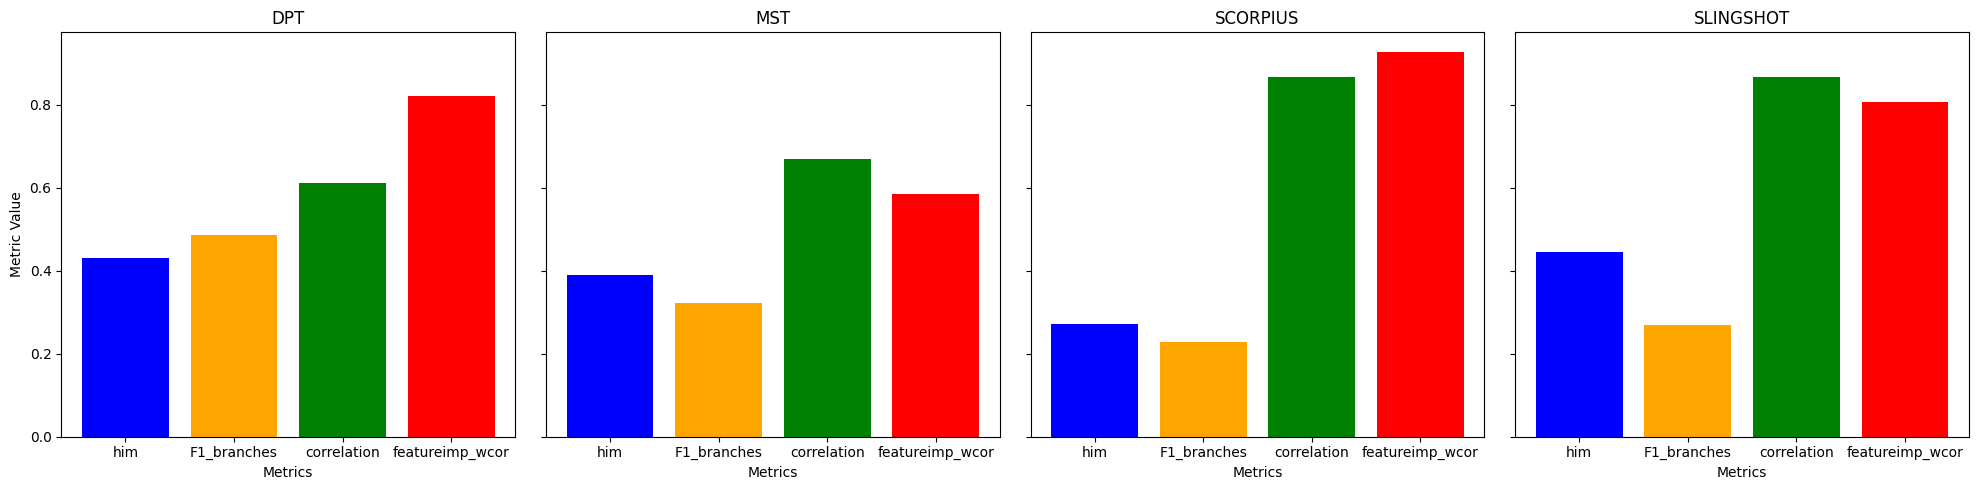

In [41]:
# Prepare data for plotting
metrics = ['him', 'F1_branches', 'correlation', 'featureimp_wcor']
models = ['DPT', 'MST', 'SCORPIUS', 'SLINGSHOT']

# Extract metric values from R variables
dpt_values = dpt_selected_metrics.iloc[0].tolist()
mst_values = mst_selected_metrics.iloc[0].tolist()
scorpius_values = scorpius_selected_metrics.iloc[0].tolist()
slingshot_values = slingshot_selected_metrics.iloc[0].tolist()

# Combine data for plotting
data = [dpt_values, mst_values, scorpius_values, slingshot_values]

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i, ax in enumerate(axes):
    ax.bar(metrics, data[i], color=['blue', 'orange', 'green', 'red'])
    ax.set_title(models[i])
    ax.set_ylabel('Metric Value' if i == 0 else '')
    ax.set_xlabel('Metrics')

plt.tight_layout()
plt.show()

# paga, palantir, margaret, via2.0

In [42]:
%%R
str(data)

List of 21
 $ id                   : chr "real/silver/mouse-cell-atlas-combination-2"
 $ cell_ids             : chr [1:3211] "FetalLiver_1.AAGCGGGGGCGAATCTCT" "FetalLiver_1.CTCGCAAGTTTATTCATA" "FetalLiver_1.ACAATAGCCTAGTAGTCG" "FetalLiver_1.CTCGCATACTTCTCAAAG" ...
 $ cell_info            : tibble [3,211 × 9] (S3: tbl_df/tbl/data.frame)
  ..$ X1         : int [1:3211] 81549 82735 81642 82755 81510 82750 81485 81842 82357 82752 ...
  ..$ cell_id    : chr [1:3211] "FetalLiver_1.AAGCGGGGGCGAATCTCT" "FetalLiver_1.CTCGCAAGTTTATTCATA" "FetalLiver_1.ACAATAGCCTAGTAGTCG" "FetalLiver_1.CTCGCATACTTCTCAAAG" ...
  ..$ cluster_id : chr [1:3211] "Fetal-Liver_1" "Fetal-Liver_1" "Fetal-Liver_1" "Fetal-Liver_1" ...
  ..$ tissue     : chr [1:3211] "Fetal-Liver" "Fetal-Liver" "Fetal-Liver" "Fetal-Liver" ...
  ..$ batch      : chr [1:3211] "FetalLiver_1" "FetalLiver_1" "FetalLiver_1" "FetalLiver_1" ...
  ..$ barcode    : chr [1:3211] "AAGCGGGGGCGAATCTCT" "CTCGCAAGTTTATTCATA" "ACAATAGCCTAGTAGTCG" "CTCGCATACT